<a href="https://colab.research.google.com/github/shivanshi308/sentimentAnalyzer/blob/main/audioProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install librosa

In [3]:
import mimetypes
import IPython.display as ipd  
import os # interface with underlying OS that python is running on
import sys
import librosa,librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np




In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
cd /content/gdrive/MyDrive/sentimentAnalysis

/content/gdrive/MyDrive/sentimentAnalysis


In [7]:
ls

audio_speech_actors_01-24/  Waveplot_MaleNeutral.png


<class 'numpy.ndarray'> <class 'int'>
(72838,) 22050


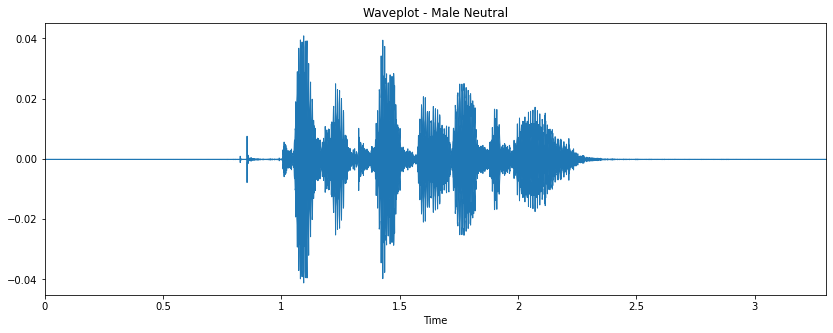

In [8]:
audio_data = './audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav'
x,sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)
librosa.load(audio_data, sr=16100)
#ipd.Audio('/content/03-01-01-01-01-01-01.wav')


plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')

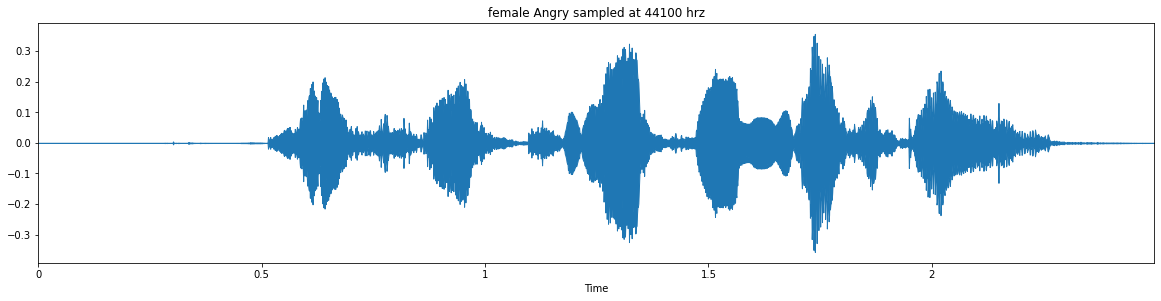

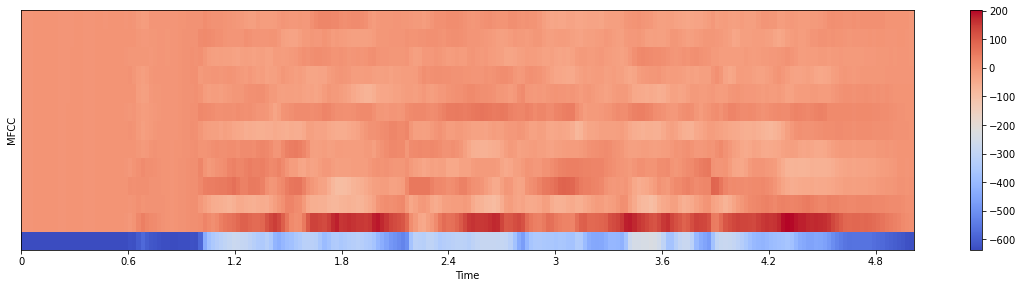

In [9]:
# Feature analysis (mfcc, sampling plot)#1
# Gender - Female; Emotion - Angry
path = './audio_speech_actors_01-24//Actor_08/03-01-05-02-01-01-08.wav'
X, sample_rate = librosa.load(path, res_type='kaiser_fast', duration=2.5, sr=22050*2, offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('female Angry sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

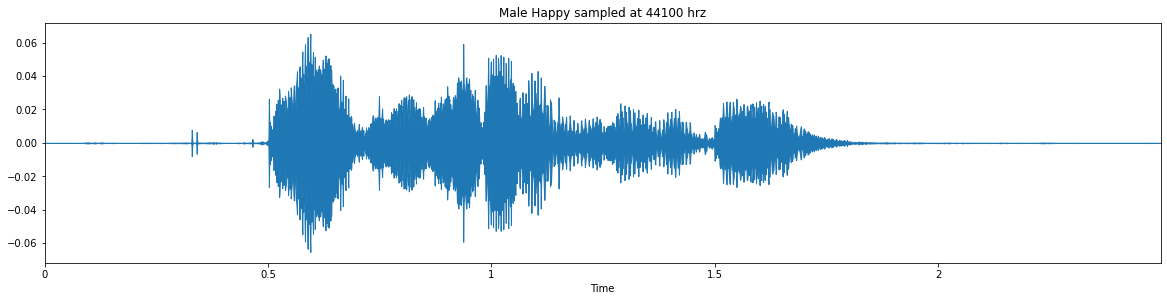

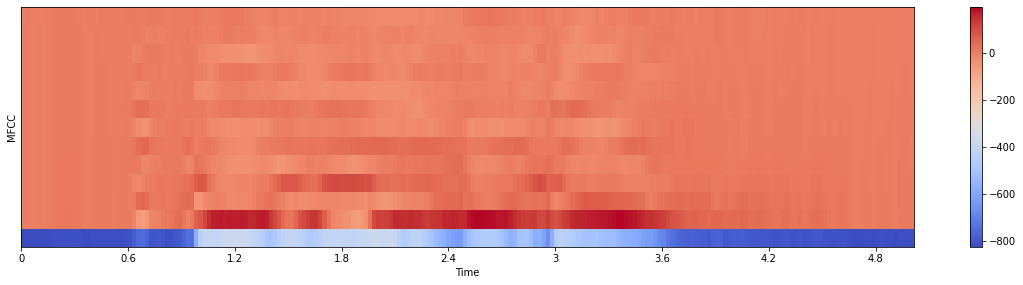

In [10]:
# Feature analysis #2
# Gender - Male; Emotion - Happy
path = './audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav'
X, sample_rate = librosa.load(path, res_type='kaiser_fast', duration=2.5, sr=22050*2, offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Male Happy sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

In [11]:
# creating data frame with labels of gender, emotion and path

emotion = []
gender = []
actor = []
path = []

rav='./audio_speech_actors_01-24/'
dir_list = os.listdir(rav)
dir_list.sort()
#print(dir_list)

for i in dir_list:
    if(i=='.ipynb_checkpoints'):
      continue
    filename = os.listdir( rav + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        path.append(rav + i + '/' + f)

audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(path, columns = ['path'])],axis=1)

audio_df

,gender,emotion,actor,path
0,male,angry,1,./audio_speech_actors_01-24/Actor_01/03-01-05-...
1,male,happy,1,./audio_speech_actors_01-24/Actor_01/03-01-03-...
2,male,happy,1,./audio_speech_actors_01-24/Actor_01/03-01-03-...
3,male,sad,1,./audio_speech_actors_01-24/Actor_01/03-01-04-...
4,male,sad,1,./audio_speech_actors_01-24/Actor_01/03-01-04-...
...,...,...,...,...
1435,female,surprise,24,./audio_speech_actors_01-24/Actor_24/03-01-08-...
1436,female,surprise,24,./audio_speech_actors_01-24/Actor_24/03-01-08-...
1437,female,disgust,24,./audio_speech_actors_01-24/Actor_24/03-01-07-...
1438,female,surprise,24,./audio_speech_actors_01-24/Actor_24/03-01-08-...


In [14]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING 

df = pd.DataFrame(columns=['mel_spectrogram_feature'])
counter=0
for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast', duration=2.5 ,sr=44100 ,offset=0.5)
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13), axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

    
# Now extract the mean bands to its own feature columns
df = pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram_feature'].values.tolist())],axis=1)
# replace NA with 0
df=df.fillna(0)
df.head(10)

,gender,emotion,actor,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
0,male,angry,1,./audio_speech_actors_01-24/Actor_01/03-01-05-...,-55.663086,-56.170334,-56.157845,-54.663479,-55.166775,-56.156944,-56.156944,-56.156944,-56.156944,-56.156944,-56.156944,-56.156944,-56.156944,-56.156944,-56.156944,-56.156944,-56.156944,-56.156944,-55.998737,-55.762722,-55.630779,-56.157837,-56.156944,-56.155884,-56.061825,-54.492226,-54.634743,-55.506390,-56.036907,-55.510700,-55.296021,-55.582066,-55.227253,-55.727539,-55.387268,-54.642632,...,-35.738827,-36.451382,-37.111019,-39.396664,-40.882309,-41.558022,-41.692753,-42.048317,-43.824001,-45.768364,-46.704411,-46.227947,-49.023617,-48.448837,-48.933342,-48.932930,-48.433514,-48.457253,-49.773766,-52.690739,-53.925591,-53.430386,-55.510582,-56.147175,-56.156944,-56.156944,-56.156944,-54.705505,-53.434776,-53.804070,-55.155067,-56.156944,-56.156944,-56.156944,-55.844219,-56.156944,-56.156944,-56.156944,-56.156944,-56.156944
1,male,happy,1,./audio_speech_actors_01-24/Actor_01/03-01-03-...,-56.733879,-56.752663,-56.415257,-55.715679,-55.817852,-55.832748,-55.889751,-55.116520,-54.244675,-56.211891,-55.092178,-54.787151,-54.038261,-55.647537,-56.444504,-56.319523,-56.713543,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.756023,-56.565186,-55.571655,-52.895020,-51.686813,-51.719887,-51.996422,-52.340263,-54.653461,-53.886574,-54.058254,-56.521004,-56.756023,...,-27.138912,-27.898018,-28.345449,-25.960142,-26.018398,-27.515379,-28.989454,-29.534567,-30.486324,-31.594957,-34.359585,-35.382961,-35.551334,-36.985371,-36.776546,-36.158688,-37.955399,-39.960537,-39.687519,-37.622765,-34.629063,-31.396507,-28.503803,-28.003227,-30.962614,-34.054192,-36.136395,-37.490238,-37.561604,-36.588078,-38.339474,-39.931885,-43.064491,-46.631512,-48.998482,-46.067894,-45.294285,-47.657372,-51.417202,-54.335350
2,male,happy,1,./audio_speech_actors_01-24/Actor_01/03-01-03-...,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.117577,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-64.744644,-59.645927,-62.325069,-65.276451,-65.243347,-65.243584,-63.977959,-62.763809,-64.460968,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.235634,-62.331516,-61.644447,-63.583885,...,-28.062843,-29.369642,-29.820456,-30.109138,-31.332304,-31.719835,-33.486259,-33.912018,-35.084892,-35.643131,-34.758232,-37.127739,-37.751213,-38.426613,-37.518589,-39.169838,-41.366596,-40.636806,-41.597267,-43.202084,-46.921001,-46.835686,-47.064396,-49.522137,-54.357304,-56.299580,-56.148746,-59.039574,-59.224522,-59.682472,-59.875900,-61.924271,-56.156918,-55.677975,-61.117817,-58.568733,-57.136806,-58.619907,-60.068314,-57.350605
3,male,sad,1,./audio_speech_actors_01-24/Actor_01/03-01-04-...,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-61.560623,-60.761108,-54.641113,-53.542545,-51.000786,-51.025070,...,-23.713306,-25.706608,-27.631908,-28.372417,-30.084759,-32.126926,-33.675541,-31.229979,-28.981331,-28.971296,-29.443493,-29.182045,-30.665586,-34.791500,-36.470764,-36.504505,-37.734177,-39.759129,-40.907043,-41.976845,-45.667240,-43.999546,-44.611042,-45.547916,-46.889275,-49.041195,-50.077400,-52.746487,-56.243488,-56.062637,-55.407578,-53.844570,-54.260582,-55.809025,-54.627144,-53.186848,-53.998238,-53.535164,-57.203739,-59.989193
4,male,sad,1,./audio_speech_actors_01-24/Actor_01/03-01-04-...,-68.049080,-68.049080,-68.0490

In [ ]:
!git init

Initialized empty Git repository in /content/gdrive/MyDrive/sentimentAnalysis/.git/


In [ ]:
!git config — global user.email “shivanshi308@gmail.com”
!git config — global user.name “shivanshi308”

usage: git config [<options>]

Config file location
    --global              use global config file
    --system              use system config file
    --local               use repository config file
    -f, --file <file>     use given config file
    --blob <blob-id>      read config from given blob object

Action
    --get                 get value: name [value-regex]
    --get-all             get all values: key [value-regex]
    --get-regexp          get values for regexp: name-regex [value-regex]
    --get-urlmatch        get value specific for the URL: section[.var] URL
    --replace-all         replace all matching variables: name value [value_regex]
    --add                 add a new variable: name value
    --unset               remove a variable: name [value-regex]
    --unset-all           remove all matches: name [value-regex]
    --rename-section      rename section: old-name new-name
    --remove-section      remove a section: name
    -l, --list            list all
 

In [13]:
!git add -A

^C


In [1]:
!git ls-files

fatal: not a git repository (or any of the parent directories): .git
